# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [5]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [8]:
%pip install --upgrade notebook
%jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 529 kB 843 kB/s eta 0:00:01
     |████████████████████████████████| 423 kB 30.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 69.2 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 6.7 MB/s  eta 0:00:01
     |████████████████████████████████| 347 kB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 7.9 MB/s  eta 0:00:01
ERROR: jupyter-server 1.24.0 has requirement jupyter-client>=6.1.12, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-server 1.24.0 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-server 1.24.0 has requirement nbconvert>=6.4.4, but you'll have nbconvert 5.6.1 which is incompatible.
ERROR: jupyter-server 1.24.0 has requirement nbformat>=5.2.0, bu

UsageError: Line magic function `%jupyter` not found.


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to be between -1 and 1
])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

#### My reasoning
I chose the transforms for two key reasons: converting the images to tensors and normalizing the pixel values.

Converting images to tensors simplifies the input pipeline, allowing the MNIST images to be directly fed into the network for processing without additional conversion steps. This optimization enhances efficiency during training.

Normalization of pixel values is crucial for stabilizing and expediting the training process. By centering the pixel values around zero and scaling them to have a standard deviation of 1, we ensure more stable gradients during backpropagation, facilitating faster convergence. Moreover, normalization mitigates the impact of variations in pixel intensity across different images, thereby enhancing the model's robustness and improving generalization performance.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


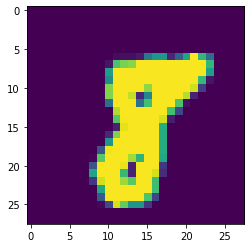

8


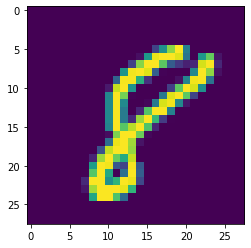

9


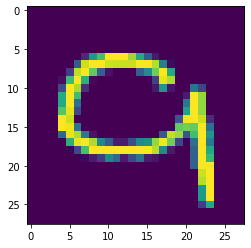

5


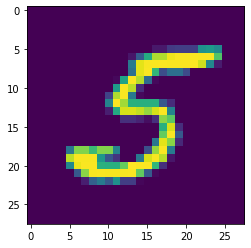

9


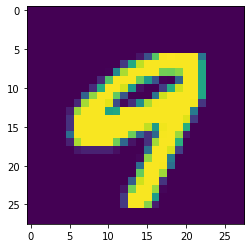

In [4]:
# Explore data
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()  # Flatten layer to convert 2D image into 1D tensor
        self.fc1 = nn.Linear(28 * 28, 128)  # Input size is 28x28 (MNIST image size), output size is 128
        self.fc2 = nn.Linear(128, 64)  # Hidden layer with 64 neurons
        self.fc3 = nn.Linear(64, 10)  # Output layer with 10 neurons (for 10 classes)

    def forward(self, x):
        x = self.flatten(x)  # Flatten the input tensor
        x = F.relu(self.fc1(x))  # Apply ReLU activation function to the first fully connected layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation function to the second fully connected layer
        x = self.fc3(x)  # Output layer (no activation function here as it's a classification problem)
        return x


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
# Instantiate the model
model = SimpleNN()

# Loss function (CrossEntropyLoss is commonly used for multi-class classification)
loss_fn = nn.CrossEntropyLoss()

# Optimizer (SGD optimizer with learning rate of 0.001)
optimizer = optim.SGD(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, otherwise use CPU
model.to(device)  # Move model to the appropriate device

# Training loop
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)  # Move inputs and labels to the appropriate device
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 250 == 249:  # Print every 250 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 250))
            running_loss = 0.0
    
    # Record the average loss for the epoch
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)

print('Finished Training')

[1,   250] loss: 2.294
[1,   500] loss: 2.255
[1,   750] loss: 2.211
[2,   250] loss: 2.108
[2,   500] loss: 2.032
[2,   750] loss: 1.938
[3,   250] loss: 1.731
[3,   500] loss: 1.594
[3,   750] loss: 1.453
[4,   250] loss: 1.229
[4,   500] loss: 1.111
[4,   750] loss: 1.008
[5,   250] loss: 0.862
[5,   500] loss: 0.811
[5,   750] loss: 0.761
[6,   250] loss: 0.688
[6,   500] loss: 0.649
[6,   750] loss: 0.614
[7,   250] loss: 0.586
[7,   500] loss: 0.562
[7,   750] loss: 0.548
[8,   250] loss: 0.524
[8,   500] loss: 0.504
[8,   750] loss: 0.495
[9,   250] loss: 0.474
[9,   500] loss: 0.467
[9,   750] loss: 0.474
[10,   250] loss: 0.444
[10,   500] loss: 0.451
[10,   750] loss: 0.437
Finished Training


Plot the training loss (and validation loss/accuracy, if recorded).

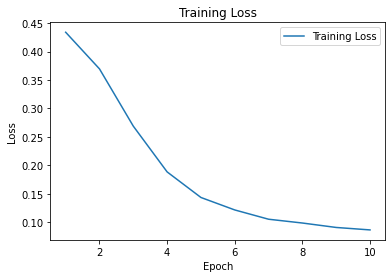

In [8]:
# Plot the training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy on the test set: {:.2f}%'.format(accuracy))

Accuracy on the test set: 88.73%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

[1,   250] loss: 0.664
[1,   500] loss: 0.326
[1,   750] loss: 0.257
[2,   250] loss: 0.184
[2,   500] loss: 0.155
[2,   750] loss: 0.157
[3,   250] loss: 0.120
[3,   500] loss: 0.116
[3,   750] loss: 0.119
[4,   250] loss: 0.094
[4,   500] loss: 0.099
[4,   750] loss: 0.103
[5,   250] loss: 0.076
[5,   500] loss: 0.084
[5,   750] loss: 0.086
[6,   250] loss: 0.076
[6,   500] loss: 0.071
[6,   750] loss: 0.073
[7,   250] loss: 0.060
[7,   500] loss: 0.065
[7,   750] loss: 0.058
[8,   250] loss: 0.051
[8,   500] loss: 0.058
[8,   750] loss: 0.063
[9,   250] loss: 0.047
[9,   500] loss: 0.052
[9,   750] loss: 0.056
[10,   250] loss: 0.043
[10,   500] loss: 0.051
[10,   750] loss: 0.047
Finished Training


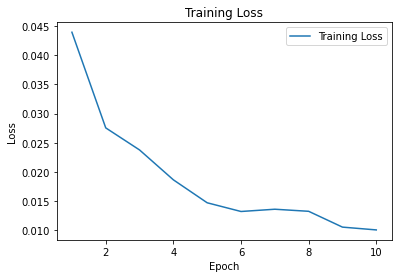

Accuracy on the test set: 97.36%


In [10]:
# Define the modified model architecture
class ImprovedNN(nn.Module):
    def __init__(self):
        super(ImprovedNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)  # Increased number of neurons
        self.fc2 = nn.Linear(256, 128)  # Additional hidden layer
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))  # Additional hidden layer
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the improved model
improved_model = ImprovedNN().to(device)

# Loss function (NLLLoss with log_softmax activation)
loss_fn = nn.NLLLoss()

# Optimizer (Adam optimizer with default parameters)
optimizer = optim.Adam(improved_model.parameters())

# Training loop
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = improved_model(inputs)
        loss = loss_fn(F.log_softmax(outputs, dim=1), labels)  # Apply log_softmax before calculating loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 250 == 249:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 250))
            running_loss = 0.0

    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)

print('Finished Training')

# Plot the training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing the improved model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = improved_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy on the test set: {:.2f}%'.format(accuracy))

## Saving your model
Using `torch.save`, save your model for future loading.

In [11]:
# Save the trained model
torch.save(improved_model.state_dict(), 'improved_model.pth')

print("Model saved successfully!")

Model saved successfully!
